# Techniques to Handle Imbalanced Data & Model Calibration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

## 1. Techniques

### Original data

In [4]:
np.random.seed(54321)
n_sample = 10000
factor = 0.01
x0 = 10 * np.random.random(n_sample)
y0 = 10 * np.random.random(n_sample)
x1 = 10 * np.random.random(int(n_sample*factor))
y1 = 2 * np.random.random(int(n_sample*factor)) + np.abs(np.random.normal(0, 1, int(n_sample*factor)))

df = pd.DataFrame(data = {'x':np.hstack((x0, x1)), 
                          'y':np.hstack((y0, y1)), 
                          'class': np.hstack((np.repeat(0, len(x0)), np.repeat(1, len(x1))))
                         }
                 )

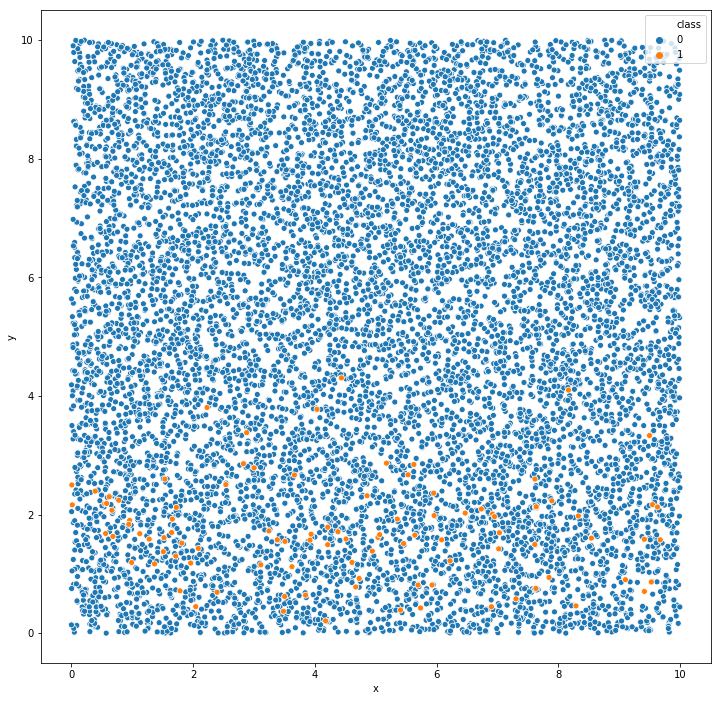

In [3]:
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df)
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Random Under-sampling

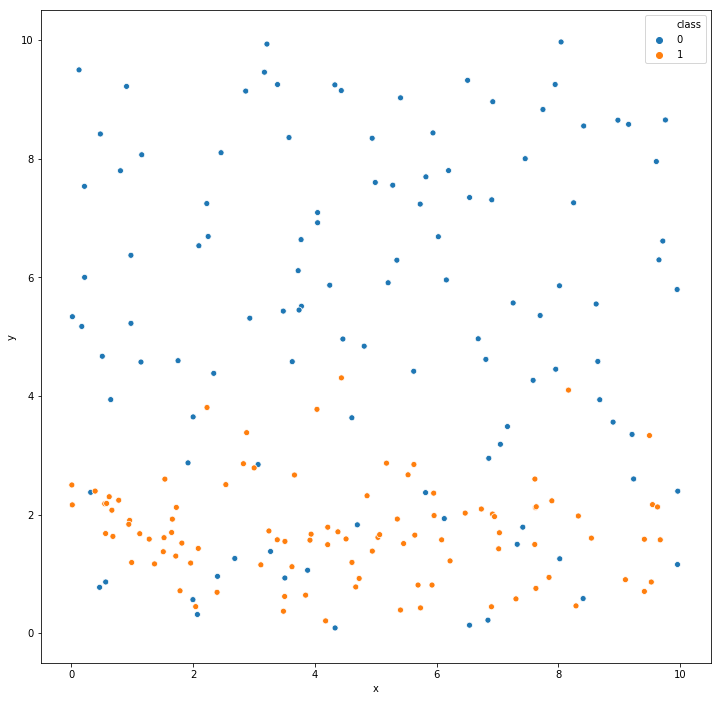

In [4]:
np.random.seed(54321)
model = RandomUnderSampler(sampling_strategy=0.9)
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Random Over-sampling

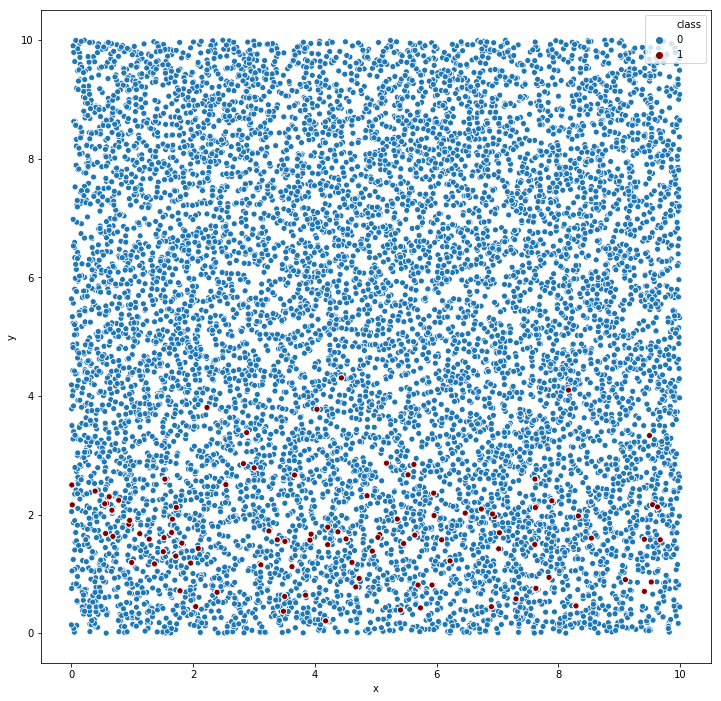

In [5]:
np.random.seed(54321)
model = RandomOverSampler(sampling_strategy=0.1)
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "maroon"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Tomek's Link

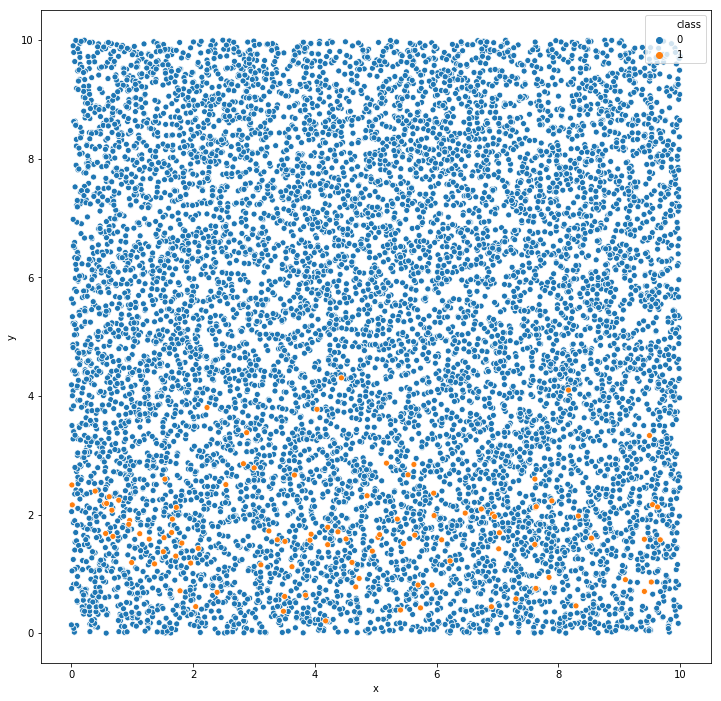

In [6]:
np.random.seed(54321)
model = TomekLinks(sampling_strategy='majority')
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Clustered Centroids

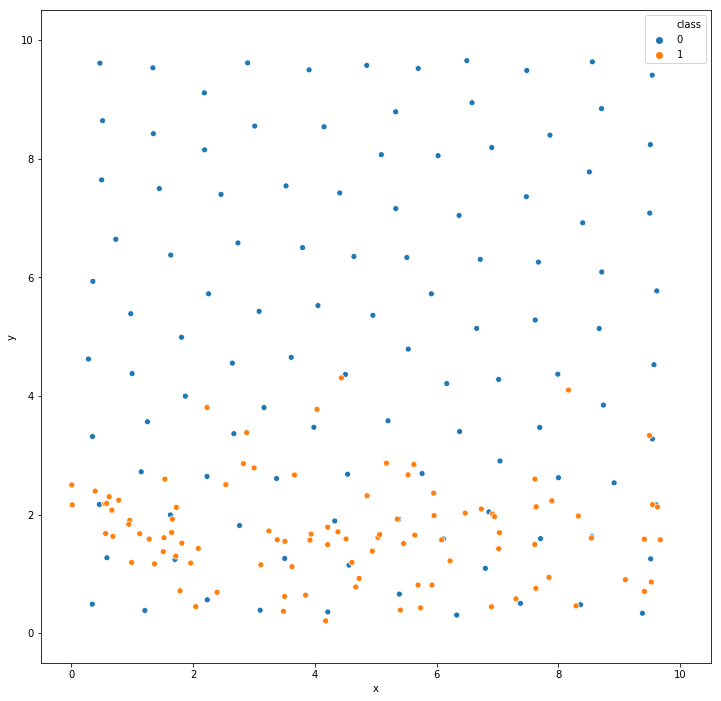

In [7]:
np.random.seed(54321)
model = ClusterCentroids(sampling_strategy=0.9)
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Edited Nearest Neighbours

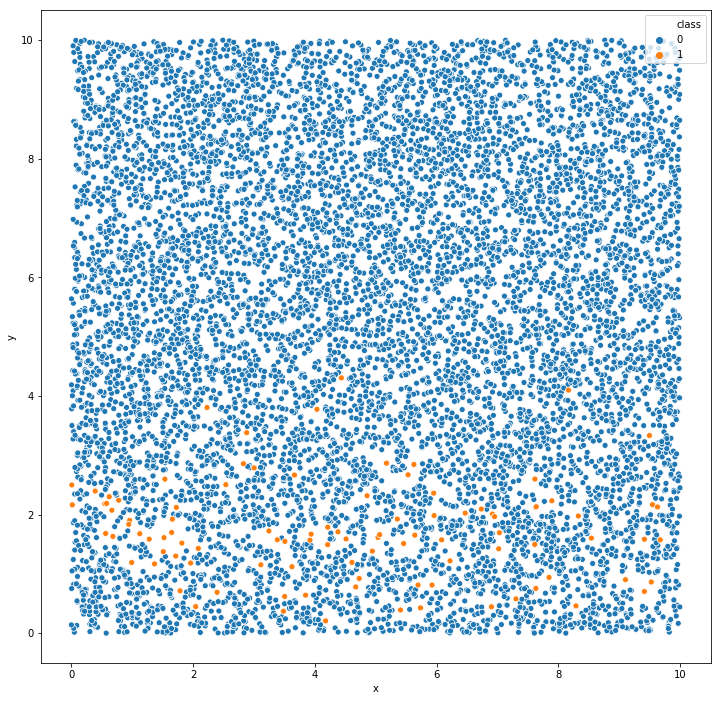

In [15]:
np.random.seed(54321)
model = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors = 5)
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Condensed Nearest Neighbour

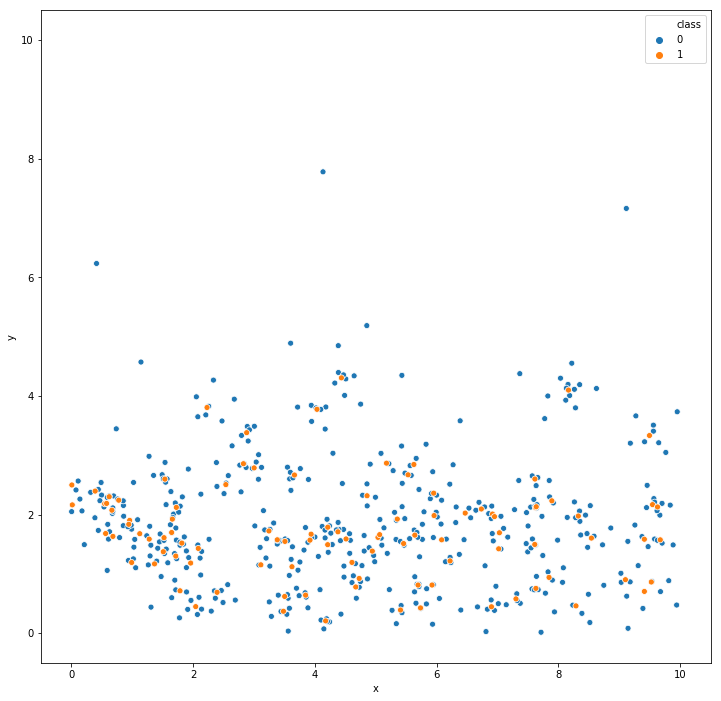

In [19]:
np.random.seed(54321)
model = CondensedNearestNeighbour(sampling_strategy='majority')
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### SMOTE

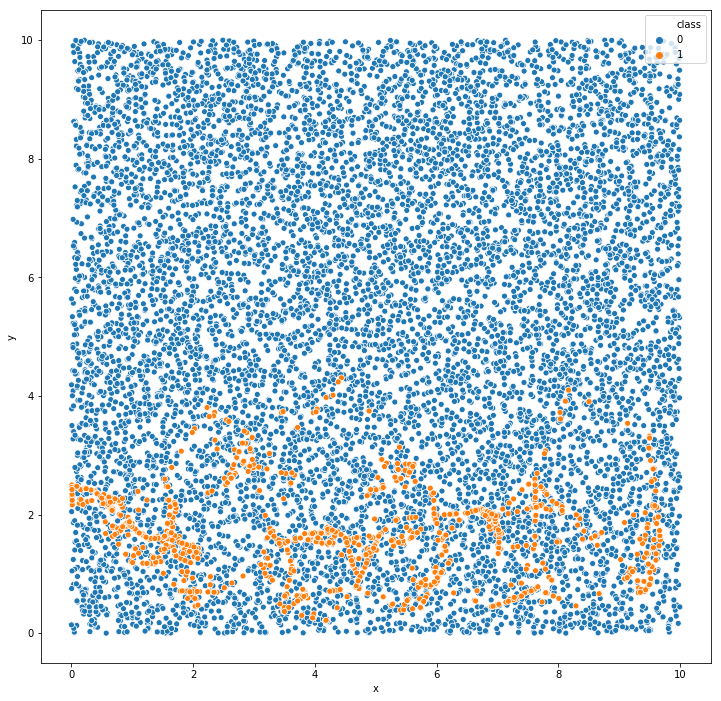

In [5]:
np.random.seed(54321)
model = SMOTE(sampling_strategy=0.1)
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### ADASYN

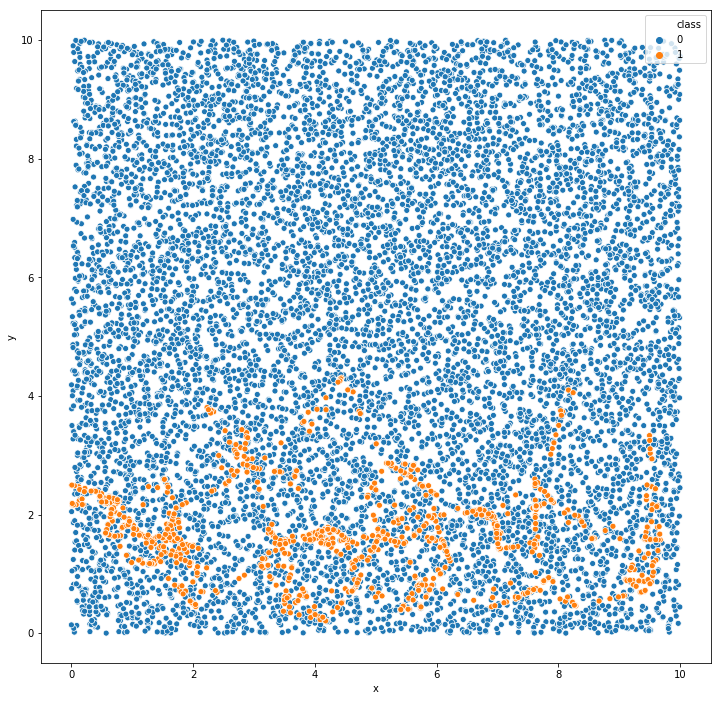

In [6]:
np.random.seed(54321)
model = ADASYN(sampling_strategy=0.1)
df_model, class_model = model.fit_sample(df.loc[:, ['x', 'y']], df.loc[:, ['class']])
df_model['class'] = class_model

sns.set_palette("tab10")
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df_model, palette=["C0", "C1"])
plt.legend(loc='upper right')
ax.set_xlim(min(df.x)-0.5,max(df.x)+0.5)
ax.set_ylim(min(df.y)-0.5,max(df.y)+0.5)
plt.show()

### Class Weighting

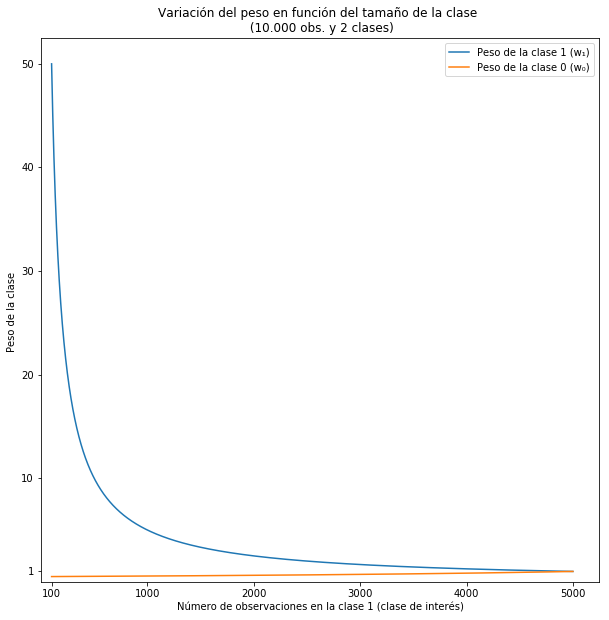

In [9]:
def class_weights(n_obs, n_classes, n_obs_class):
    return n_obs/(n_classes * n_obs_class)

n_obs = 10000
n_classes = 2
ini_range = 100
end_range = int(n_obs/2)
n_obs_classes = range(ini_range, end_range)

w0 = [class_weights(n_obs,n_classes,i) for i in n_obs_classes]
w1 = [class_weights(n_obs,n_classes,n_obs-i) for i in n_obs_classes]

plt.figure(figsize = (10,10))
ax = sns.lineplot(n_obs_classes, w0, label = "Peso de la clase 1 (w\N{SUBSCRIPT ONE})")
ax = sns.lineplot(n_obs_classes, w1, label = "Peso de la clase 0 (w\N{SUBSCRIPT ZERO})")
ax.set(xlabel='Número de observaciones en la clase 1 (clase de interés)', ylabel='Peso de la clase ')
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_xticks([100,1000,2000,3000,4000,5000]) 
ax.set_xticklabels(['100','1000','2000','3000','4000','5000'])
ax.set_yticks([1,10,20,30,40,50]) 
ax.set_yticklabels(['1','10','20','30','40','50'])
plt.title('Variación del peso en función del tamaño de la clase \n (10.000 obs. y 2 clases)').set_fontsize('12')
plt.show()

## 2. Benchmark

### Original data

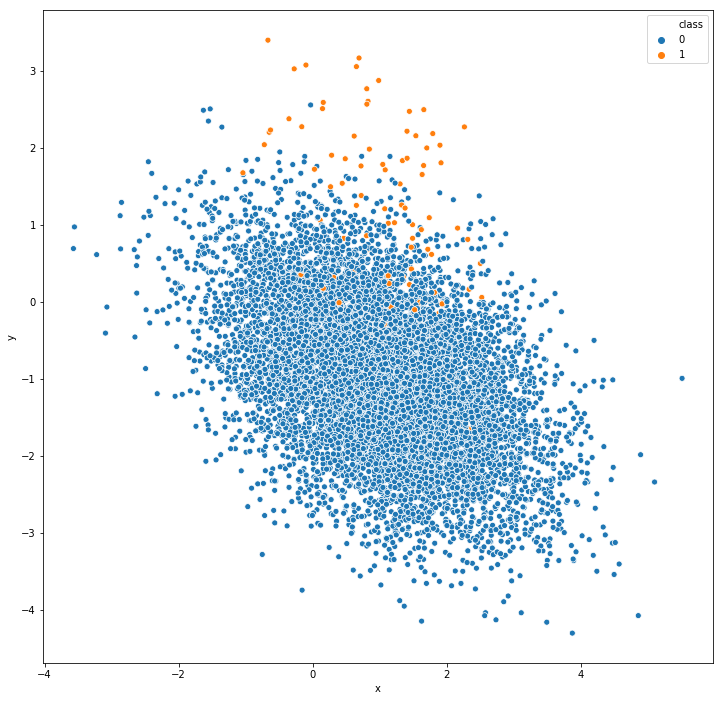

In [4]:
# generate dataset
X_train, y_train = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1,weights=[0.99], flip_y=0, random_state = 7668787)
df = pd.DataFrame(data = {'x': X_train[:, 0], 'y': X_train[:, 1], 'class': y_train})
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df, palette=["C0", "C1"])
plt.legend(loc='upper right')
plt.show()

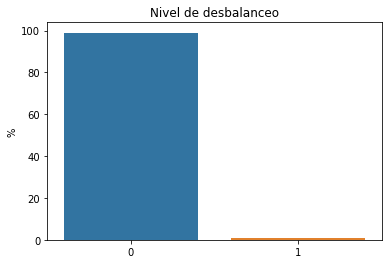

In [5]:
df_show = df['class'].value_counts().reset_index(name = 'N')
df_show['%'] = 100*(df_show['N']/X_train.shape[0])
df_show = df_show[['N', '%']]
sns.barplot([0,1], df_show['%'])
plt.title('Nivel de desbalanceo')
plt.show()

In [6]:
df_show

N     %
0  9900  99.0
1   100   1.0

In [7]:
# META-PARAMETERS
TRAIN_TEST = 0
metric_name = 'ROC AUC'
metric_sklearn = 'roc_auc'
df_metrics = pd.DataFrame(columns = [metric_name])

### Vanilla

In [8]:
# define model
model_name = 'Vanilla'
model = DecisionTreeClassifier()

if TRAIN_TEST:
    # fit model
    model.fit(X_train, y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.675


### Random Under-sampling

In [9]:
# define model
model_name = 'Random Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = RandomUnderSampler(sampling_strategy=0.1)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.738


### Bootstrap Random Under-sampling

In [10]:
# define model
model_name = 'Bootstrap Random Under-sampling'
model = DecisionTreeClassifier()

if TRAIN_TEST:
    # fit model
    model.fit(X_train, y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.673


### Tomek's Link Undersampling

In [11]:
# define model
model_name = 'Tomeks Links Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = TomekLinks(sampling_strategy='majority', n_jobs=-1)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.677


### Clustered Centroids Under-sampling

In [12]:
# define model
model_name = 'Clustered Centroids Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = ClusterCentroids(sampling_strategy=0.5, n_jobs=-1)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.741


### Edited Nearest Neighbours Under-sampling

In [13]:
# define model
model_name = 'Edited Nearest Neighbours Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = EditedNearestNeighbours(sampling_strategy='majority', n_jobs=-1)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.705


### Condensed Nearest Neighbour Under-sampling

In [14]:
# define model
model_name = 'Condensed Nearest Neighbour Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = CondensedNearestNeighbour(sampling_strategy='majority', n_jobs=-1)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.673


### Random Over-sampling

In [15]:
# define model
model_name = 'Random Over-sampling'
model = DecisionTreeClassifier()
sampling_strategy = RandomOverSampler(sampling_strategy=0.5)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.666


### SMOTE

In [16]:
# define model
model_name = 'SMOTE'
model = DecisionTreeClassifier()
sampling_strategy = SMOTE(sampling_strategy=0.5)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.754


### ADASYN

In [17]:
# define model
model_name = 'ADASYN'
model = DecisionTreeClassifier()
sampling_strategy = ADASYN(sampling_strategy=0.5)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.758


### Class Weighting

In [18]:
# define model
model_name = 'Class Weighting'
model = DecisionTreeClassifier(class_weight='balanced')

if TRAIN_TEST:
    # fit model
    model.fit(X_train, y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.669


### Random Under-sampling + Random Over-sampling

In [20]:
# define model
model_name = 'Random Under-sampling + Random Over-sampling'
model = DecisionTreeClassifier()
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('over', over),
        ('under', under),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.729


### SMOTE + Tomeks-Links

In [21]:
# define model
model_name = 'SMOTE + Tomeks Links Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = SMOTETomek(sampling_strategy=0.5, tomek=TomekLinks(sampling_strategy='majority'))

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.753


### SMOTE + Edited Nearest Neighbours

In [22]:
# define model
model_name = 'SMOTE + Edited Nearest Neighbours Under-sampling'
model = DecisionTreeClassifier()
sampling_strategy = SMOTEENN(sampling_strategy=0.5, enn=EditedNearestNeighbours(sampling_strategy='majority'))

if TRAIN_TEST:
    # fit sampling strategy
    sampled_X_train, sampled_y_train = sampling_strategy.fit_sample(X_train, y_train)
    # fit model
    model.fit(sampled_X_train, sampled_y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('sampling', sampling_strategy),
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.795


### Gradient Boosting

In [23]:
# define model
model_name = 'Gradient Boosting'
model = GradientBoostingClassifier()

if TRAIN_TEST:
    # fit model
    model.fit(X_train, y_train)
    # evaluate model performance
    y_score = model.predict_proba(X_test)[:, 1]
    pr_auc = average_precision_score(y_test, y_score)
else:
    pipeline = Pipeline([
        ('classification', model)
    ])
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    # evaluate model performance
    scores = cross_validate(pipeline, X_train, y_train, scoring=metric_sklearn, cv=cv, n_jobs=-1)
    score = np.mean(scores['test_score'])
print('Score: %.3f' % score)
df_metrics.loc[model_name, [metric_name]] = score

Score: 0.905


### Results

In [27]:
def highlight_values(s):
    if type(s[0])!=str:
        s = np.argsort(s)
        style = ['']*(s.shape[0])
        style[s[-1]] = 'color: blue; font-weight: bold'
        style[s[-2]] = 'color: green; font-weight: bold'
        style[s[0]] = 'color: red; font-weight: bold'
    else:
        style = ['' for v in range(len(s))]
    return style

In [28]:
df_metrics_show = df_metrics.copy()
df_metrics_show['Improvement'] = df_metrics_show[metric_name] > df_metrics_show.loc['Vanilla', metric_name]
df_metrics_show['Improvement'] = df_metrics_show['Improvement'].astype(str)
df_metrics_show.loc['Vanilla', 'Improvement'] = ''
df_metrics_show[metric_name] = 100 * df_metrics_show[metric_name].astype(float).round(4)

In [29]:
df_metrics_show.style.apply(highlight_values)

## 3. Calibration

### Original data

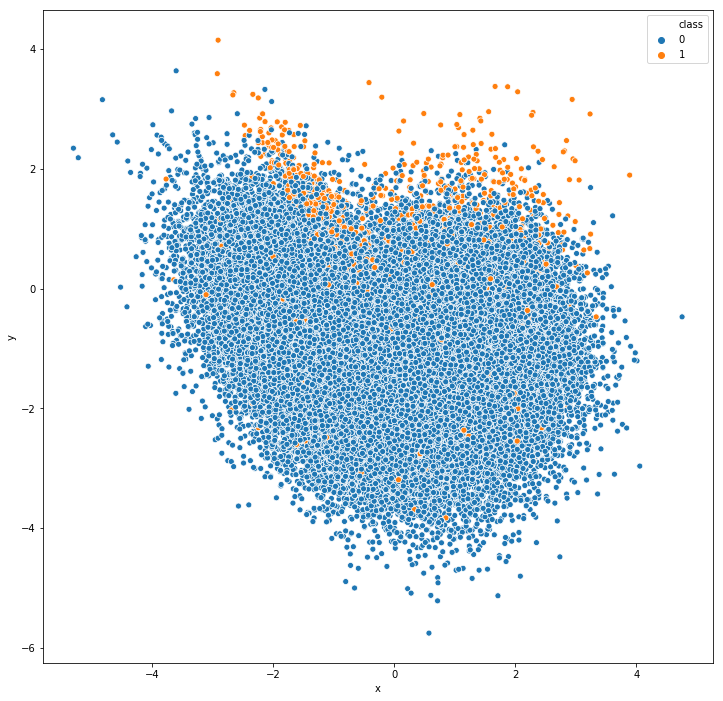

In [35]:
# generate dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, 
n_redundant=0, weights=[0.99])
df = pd.DataFrame(data = {'x': X[:, 0], 'y': X[:, 1], 'class': y})
plt.figure(figsize = (12,12))
ax = sns.scatterplot('x', 'y', hue = 'class', data = df, palette=["C0", "C1"])
plt.legend(loc='upper right')
plt.show()

### Reliability diagrams

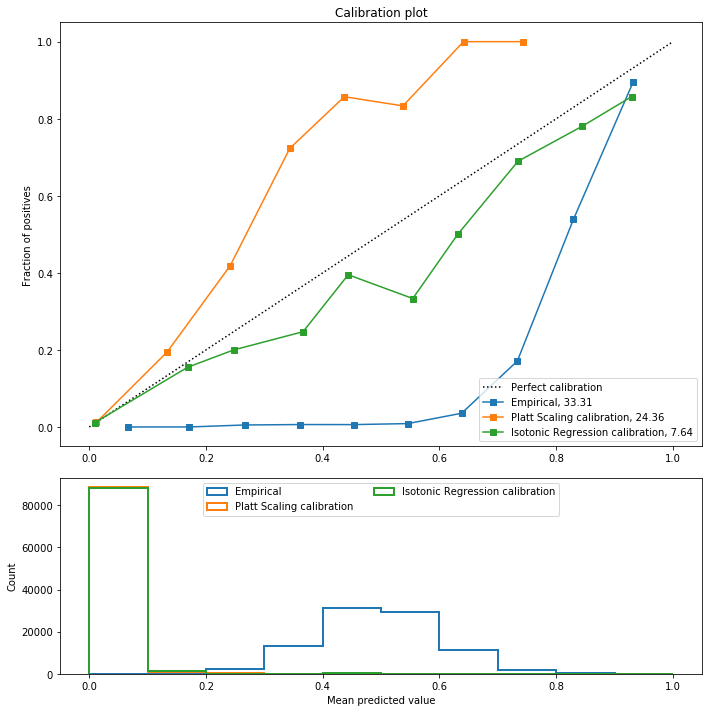

In [36]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

train_samples = 10000

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

model = LinearSVC(C=1.0)
sigmoid_calibrated_model = CalibratedClassifierCV(model, method='sigmoid')
isotonic_calibrated_model = CalibratedClassifierCV(model, method='isotonic')

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfect calibration")
for clf, name in [(model, 'Empirical'),
                  (sigmoid_calibrated_model, 'Platt Scaling calibration'),
                  (isotonic_calibrated_model, 'Isotonic Regression calibration')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    calibration_score = np.mean(np.abs(fraction_of_positives-mean_predicted_value))
    calibration_score = np.round(100 * np.round(calibration_score, 4),2)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="{}, {}".format(name, calibration_score))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()